### Importing the libraries

In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

loading the train dataset

In [25]:
#data augmentation to introduce random flips in the image set
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
])

In [28]:
train_data = tf.keras.utils.image_dataset_from_directory(
    "Vegetable Images/BinaryClass/train/",
    labels="inferred",
    label_mode="binary",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64,64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False

)
#applying the augmentation
train_data = train_data.map(lambda x, y: (data_augmentation(x, training=True), y))


Found 2000 files belonging to 2 classes.


loading validation set

In [29]:
validation_data = tf.keras.utils.image_dataset_from_directory(
    "Vegetable Images/BinaryClass/validation/",
    labels="inferred",
    label_mode="binary",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64,64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False

)

Found 400 files belonging to 2 classes.


In [30]:
# Building model
model = tf.keras.models.Sequential()

#rescaling to normalise pixel values
rescale = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)
model.add(rescale)

#Adding convolutional layers and pooling layers
model.add(tf.keras.layers.Conv2D(filters = 64, kernel_size=3, activation='relu', input_shape=[64,64,3]))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

model.add(tf.keras.layers.Conv2D(filters = 64, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(units=128, activation='relu'))

model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [31]:
#compiling the model
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
training_history = model.fit(train_data, validation_data=validation_data,epochs=15)

Epoch 1/15
63/63 [==============================] - 14s 207ms/step - loss: 0.5387 - accuracy: 0.7535 - val_loss: 0.1692 - val_accuracy: 0.9825
Epoch 2/15
63/63 [==============================] - 13s 199ms/step - loss: 0.2227 - accuracy: 0.9200 - val_loss: 0.0443 - val_accuracy: 0.9900
Epoch 3/15
63/63 [==============================] - 12s 192ms/step - loss: 0.1082 - accuracy: 0.9575 - val_loss: 0.0252 - val_accuracy: 0.9925
Epoch 4/15
63/63 [==============================] - 12s 194ms/step - loss: 0.0930 - accuracy: 0.9640 - val_loss: 0.0159 - val_accuracy: 0.9950
Epoch 5/15
63/63 [==============================] - 12s 192ms/step - loss: 0.1114 - accuracy: 0.9720 - val_loss: 0.0295 - val_accuracy: 0.9925
Epoch 6/15
63/63 [==============================] - 12s 197ms/step - loss: 0.0348 - accuracy: 0.9880 - val_loss: 0.0149 - val_accuracy: 0.9925
Epoch 7/15
63/63 [==============================] - 12s 188ms/step - loss: 0.0828 - accuracy: 0.9770 - val_loss: 0.0115 - val_accuracy: 0.9975

In [32]:
training_history.history

{'loss': [0.5386900901794434,
  0.22265742719173431,
  0.10821448266506195,
  0.0929783433675766,
  0.11135236918926239,
  0.03483039140701294,
  0.0828380435705185,
  0.04331374540925026,
  0.07163043320178986,
  0.034034837037324905,
  0.19389836490154266,
  0.013235226273536682,
  0.052481286227703094,
  0.05449027195572853,
  0.050499193370342255],
 'accuracy': [0.7534999847412109,
  0.9200000166893005,
  0.9574999809265137,
  0.9639999866485596,
  0.972000002861023,
  0.9879999756813049,
  0.9769999980926514,
  0.9860000014305115,
  0.9764999747276306,
  0.9884999990463257,
  0.9775000214576721,
  0.9950000047683716,
  0.9850000143051147,
  0.9860000014305115,
  0.984000027179718],
 'val_loss': [0.16923412680625916,
  0.04432064667344093,
  0.025185374543070793,
  0.015940681099891663,
  0.029481181874871254,
  0.014892173931002617,
  0.011510883457958698,
  0.006077958270907402,
  0.029210584238171577,
  0.004062069579958916,
  0.005931834690272808,
  0.10484413057565689,
  0.006

In [33]:
print(f"Validation set accuracy {training_history.history['val_accuracy'][-1] * 100}")

Validation set accuracy 95.74999809265137


### Visualising the accuracy


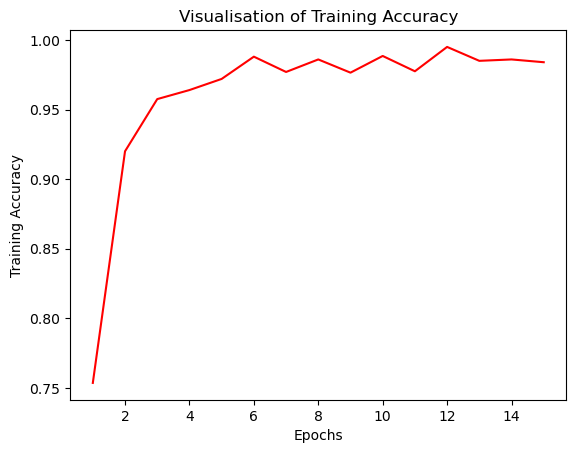

In [34]:
epochs = [ x for x in range(1,16)]
plt.plot(epochs, training_history.history['accuracy'], color='red')
plt.xlabel("Epochs")
plt.ylabel("Training Accuracy")
plt.title("Visualisation of Training Accuracy")
plt.show()


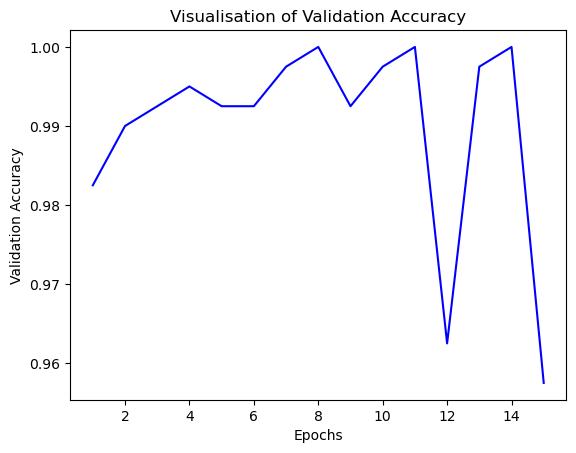

In [41]:
plt.plot(epochs, training_history.history['val_accuracy'], color="blue")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.title("Visualisation of Validation Accuracy")
plt.show()

### Testing

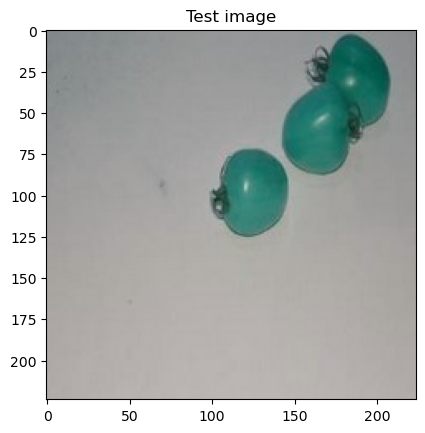

In [51]:
# Visualising and performing prediction on a single image
import cv2
image_path = "Vegetable Images/BinaryClass/test/Tomato/1001.jpg"
img = cv2.imread(image_path)
plt.imshow(img)
plt.title("Test image")
plt.show()

In [52]:
# Testing model
image = tf.keras.preprocessing.image.load_img(image_path, 
                                              target_size=(64,64))
input_array = tf.keras.preprocessing.image.img_to_array(image)
input_np_array = np.array([input_array])
#prediction
prediction = model.predict(input_np_array)

1/1 [==============================] - 0s 33ms/step


In [53]:
test_set = tf.keras.utils.image_dataset_from_directory(
    "Vegetable Images/BinaryClass/test/",
    labels= 'inferred',
    label_mode = 'categorical',
    class_names = None,
    color_mode = 'rgb',
    batch_size= 32,
    image_size=(64,64),
    shuffle = True,
    seed = None,
    validation_split= None,
    subset=None,
    interpolation = 'bilinear',
    follow_links = False,
    crop_to_aspect_ratio=False 
)

Found 400 files belonging to 2 classes.


In [54]:
test_set.class_names

['Carrot', 'Tomato']

In [57]:
prediction[0][0]

1.0

In [63]:
def predict_class(value):
    if value <=0.5:
        print("The image is Carrot")
    else:
        print("The image is Tomato")

In [64]:
predict_class(prediction[0][0])

The image is Tomato


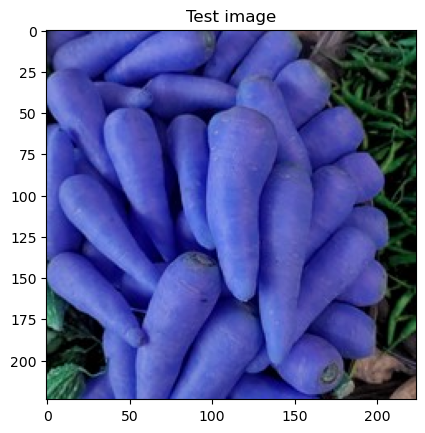

In [65]:
image_path2 = "Vegetable Images/BinaryClass/test/Carrot/1009.jpg"
img = cv2.imread(image_path2)
plt.imshow(img)
plt.title("Test image")
plt.show()

In [66]:
image2 = tf.keras.preprocessing.image.load_img(image_path2, 
                                               target_size=(64,64))
input_array2 = tf.keras.preprocessing.image.img_to_array(image2)
input_np_array2 = np.array([input_array2])
prediction2 = model.predict(input_np_array2)

1/1 [==============================] - 0s 28ms/step


In [67]:
predict_class(prediction2[0][0])

The image is Carrot
